In [1]:
#%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
from sklearn.linear_model import LinearRegression

InteractiveShell.ast_node_interactivity = "all"

# Loading reported and synthetic data

In [3]:
# Revoking top hits frames
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Averoy_seen_deer_stoch_par.pkl"
)
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer_stoch_par.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer_stoch_par.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Sunndal_seen_deer_stoch_par.pkl"
)
top_hits_Vestnes_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Vestnes_seen_deer_stoch_par.pkl"
)
top_hits_Laerdal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Laerdal_seen_deer_stoch_par.pkl"
)

In [4]:
# Reading the given number of top_hits
number_of_top_hits = 20
number_of_years = 17

top_hits_Averoy_seen_deer = top_hits_Averoy_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Tingvoll_seen_deer = top_hits_Tingvoll_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Surnadal_seen_deer = top_hits_Surnadal_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Sunndal_seen_deer = top_hits_Sunndal_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Vestnes_seen_deer = top_hits_Vestnes_seen_deer[
    0 : number_of_top_hits * number_of_years
]
top_hits_Laerdal_seen_deer = top_hits_Laerdal_seen_deer[
    0 : number_of_top_hits * number_of_years
]

top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]

## Pick out all number_of_top_hits tot_pop_bh values for each year for each municipality

In [5]:
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
tot_pop_bh = np.zeros((len(municipalities), number_of_years, number_of_top_hits))
for q in range(len(municipalities)):
    for i in range(number_of_years):
        tot_pop_bh_ = top_hits_seen_deer[q][0 : 20 * number_of_years][
            "tot_pop_bh"
        ].values
        tot_pop_bh[q, i, :] = tot_pop_bh_[i::number_of_years]

for q in range(len(municipalities)):
    print(municipalities[q], ":")
    print(tot_pop_bh[q, :, :])
    print()

Averoy :
[[1663. 1556. 1707. 1782. 1586. 1555. 1694. 1580. 1549. 1547. 1778. 1583.
  1590. 1565. 1618. 1632. 1541. 1684. 1608. 1607.]
 [1707. 1666. 1812. 1805. 1677. 1626. 1738. 1644. 1612. 1632. 1792. 1702.
  1573. 1707. 1543. 1738. 1602. 1790. 1722. 1710.]
 [1731. 1689. 1804. 1841. 1676. 1627. 1754. 1698. 1707. 1720. 1827. 1733.
  1628. 1715. 1641. 1817. 1666. 1804. 1724. 1745.]
 [1666. 1598. 1694. 1704. 1603. 1611. 1646. 1612. 1642. 1648. 1764. 1682.
  1573. 1566. 1602. 1671. 1579. 1706. 1587. 1634.]
 [1533. 1553. 1577. 1635. 1582. 1495. 1595. 1567. 1510. 1561. 1676. 1597.
  1495. 1538. 1548. 1600. 1530. 1579. 1489. 1567.]
 [1378. 1395. 1512. 1498. 1476. 1399. 1488. 1471. 1394. 1481. 1563. 1464.
  1381. 1456. 1494. 1510. 1408. 1459. 1436. 1454.]
 [1373. 1409. 1507. 1437. 1456. 1410. 1501. 1509. 1375. 1474. 1504. 1453.
  1361. 1426. 1443. 1521. 1421. 1461. 1434. 1451.]
 [1374. 1340. 1444. 1420. 1436. 1373. 1477. 1449. 1324. 1397. 1476. 1422.
  1347. 1367. 1354. 1450. 1386. 1437. 1372

## Plotting figure

CPU times: user 2.15 s, sys: 205 ms, total: 2.36 s
Wall time: 1.66 s


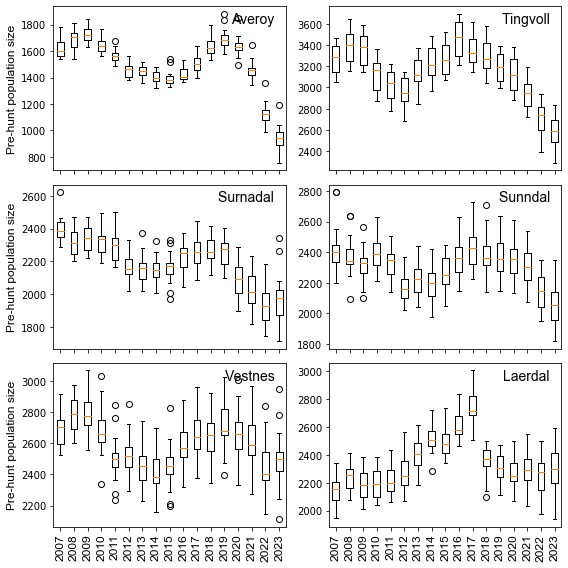

In [6]:
%%time

afont = {"fontname": "Arial"}

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(8,8))

municipalities = ["Averoy   ","Tingvoll   ", "Surnadal   ", "Sunndal   ", "Vestnes   ", "Laerdal   "]

# Reshape tot_pop_bh to (len(municipalities), number_of_top_hits, number_of_years)
arr_reshaped = np.transpose(tot_pop_bh, (0, 2, 1))

counter = 0
for q in range(3):
    for j in range(2):
        y = np.arange(1,number_of_years+1)
        ax[q,j].boxplot(arr_reshaped[counter,:,:])
        ax[q,j].margins(x=0.01)

        if (counter != 4) & (counter != 5):
            ax[q,j].set_xticks(y)
            ax[q,j].set_xticklabels([])
        else:
            ax[q,j].set_xticks(y)
            ax[q,j].set_xticklabels(np.arange(2007, 2023+1,1), rotation="vertical", fontsize=12, **afont)
        if (counter == 0) | (counter == 2) | (counter == 4):
            ax[q,j].set_ylabel("Pre-hunt population size", fontsize=12, **afont)
        ax[q,j].set_title(municipalities[counter], y=0.86, loc="right", fontsize=14, **afont)
        counter = counter + 1

fig.tight_layout()
save_dir = "figures/"
plt.savefig(save_dir + "Figure_6.pdf", dpi=600, bbox_inches="tight")
pass;